<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/Progess_Heart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras import callbacks
from keras.callbacks import EarlyStopping


In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


(299, 13)


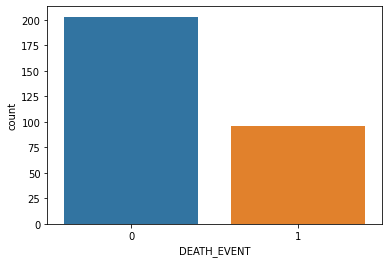

In [ ]:
ses.countplot(x=data['DEATH_EVENT'])
print(data.shape)

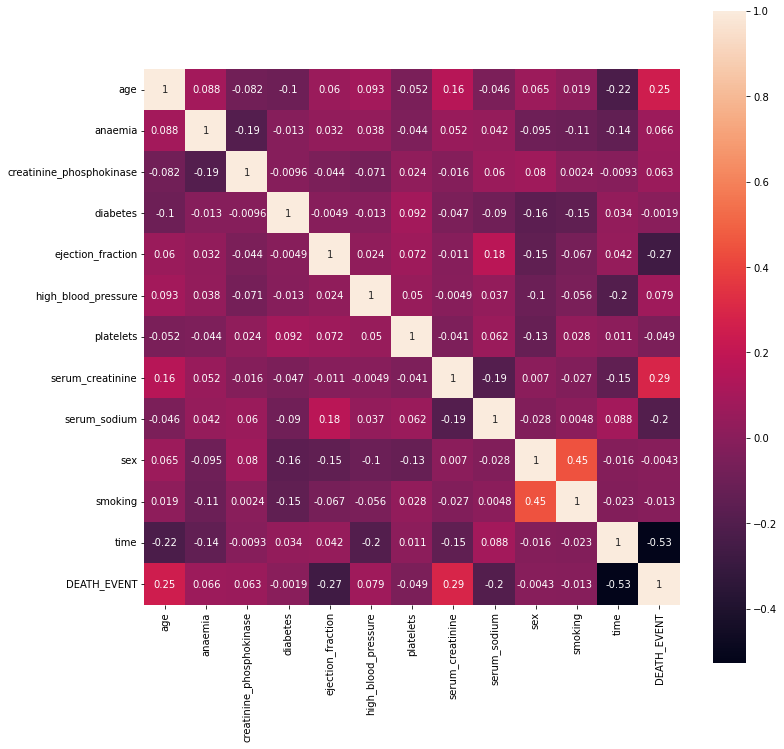

In [ ]:
correlation = data.corr()
plt.subplots(figsize=(12,12))
ses.heatmap(correlation, annot= True, square =True)

Text(0.5, 1.0, 'Distabution of Age')

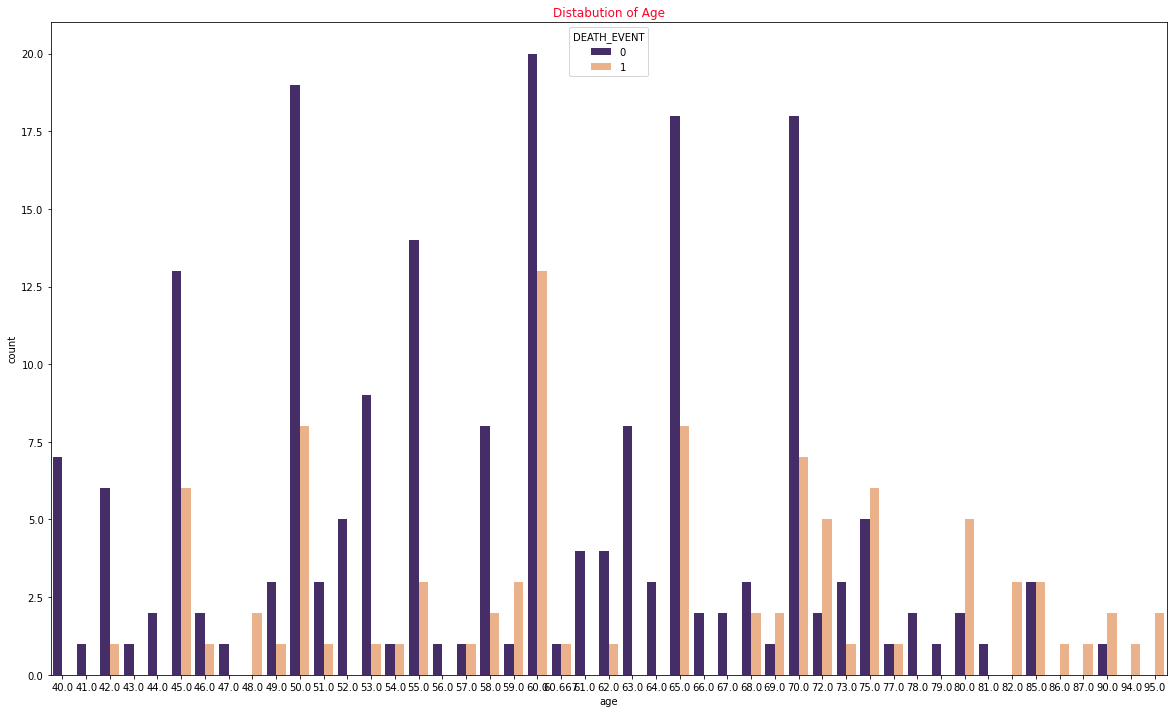

In [ ]:
plt.figure(figsize=(20,12))
days =ses.countplot(x=data['age'],data=data,hue='DEATH_EVENT',palette=['#432371',"#FAAE7B"])
days.set_title('Distabution of Age',color='#fc0328')

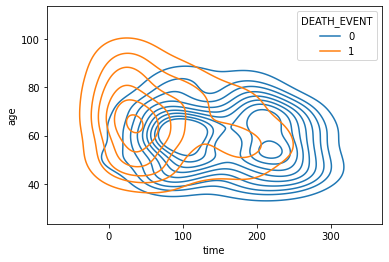

In [ ]:
ses.kdeplot(x=data['time'],y=data['age'],hue=data['DEATH_EVENT'])

In [ ]:
X=data.drop(['DEATH_EVENT'],axis =1)
Y=data['DEATH_EVENT']
print(X.shape,Y.shape)

(299, 12) (299,)


In [ ]:
col_names = list(X.columns)
Scaler = StandardScaler()
X_df = Scaler.fit_transform(X)
X_df = pd.DataFrame(X_df,columns = col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


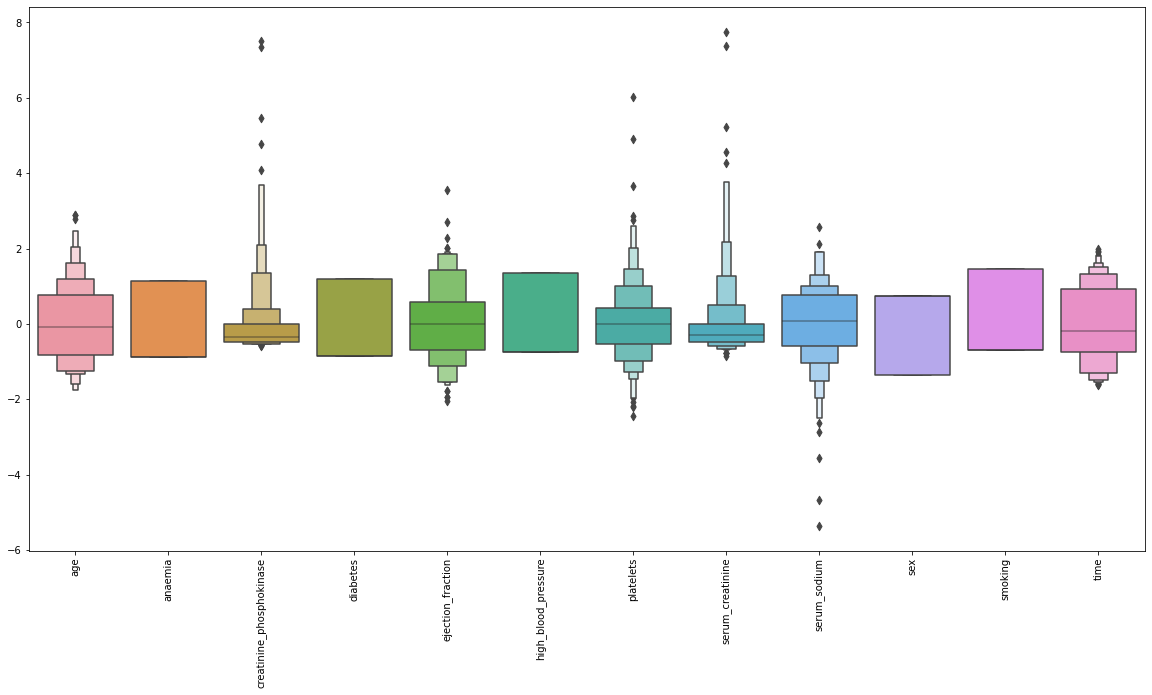

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_df,Y,test_size=0.25,random_state =7)
plt.figure(figsize=(20,10))
ses.boxenplot(data=X_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(40,activation = 'relu', input_shape = (12,)))
model2.add(Dense(40,activation = 'relu'))
model2.add(Dense(1,activation ='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                520       
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 2,201
Trainable params: 2,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model2.fit(X_train,Y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2)

Epoch 1/500
2/2 [==============================] - 0s 123ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 2/500
2/2 [==============================] - 0s 44ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 3/500
2/2 [==============================] - 0s 50ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 4/500
2/2 [==============================] - 0s 51ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 5/500
2/2 [==============================] - 0s 63ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 6/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 7/500
2/2 [==============================] - 0s 54ms/step - loss: 0.6480 - accuracy: 0.3520 - val_loss: 0.6667 - val_accuracy: 0.3333
Epoch 8/500
2/2 [==